<a href="https://colab.research.google.com/github/visheshjain2912/Air-Pollution-in-NCR/blob/main/AirPollution_O3_E_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 hr**

## **Importing Packages and Libraries**

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import math
import csv 

In [2]:
from google.colab import files
filesuploaded = files.upload()

Saving 1-Hourly_E_Only_O3_Target.csv to 1-Hourly_E_Only_O3_Target.csv


In [3]:
df = pd.read_csv("1-Hourly_E_Only_O3_Target.csv")

In [4]:
# The function is defined with default parameters so that if you call it with just your data, it will construct a DataFrame with t-1 
# as X and t as y

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

## **Data Visualization**

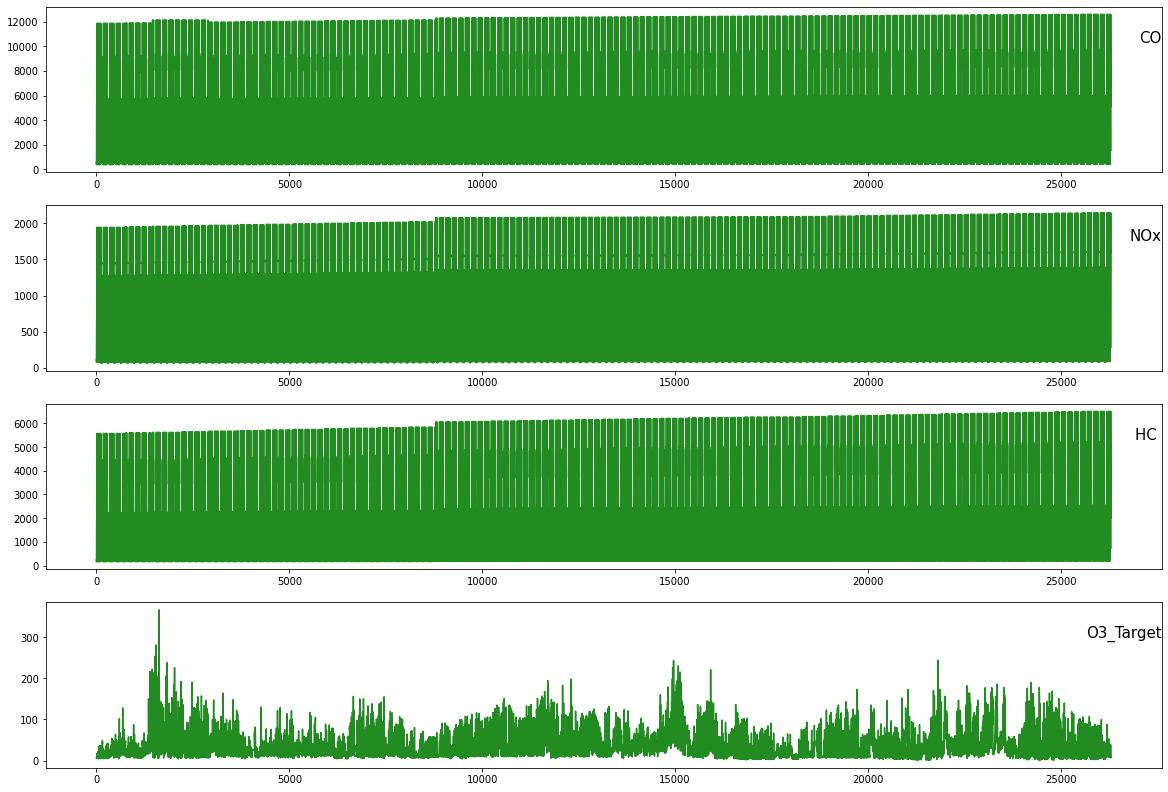

In [5]:
values = df.values

# specify columns to plot
groups = [1, 2, 3, 5]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

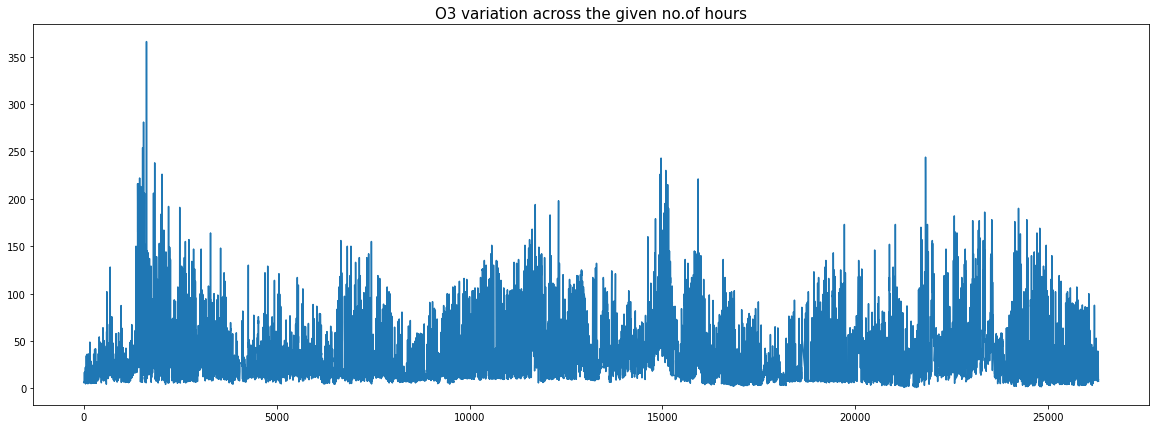

In [6]:
fig = plt.figure(figsize = (20,7))
plt.plot(df["O3_Target"])
plt.title("O3 variation across the given no.of hours", fontsize = 15)
plt.show()

## **Splitting the dataset : train.csv and test.csv**

In [9]:
# We train the model on the 1st 70% of the dataset and then test on the last 30% of the dataset
n_train_hours = (70/100)* 365 * 24 * 3
n_train_hours = math.ceil(n_train_hours)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [10]:
# train_file = "1-Hourly_E_Only_PM2.5_Target-Train.csv"
# test_file = "1-Hourly_E_Only_PM2.5_Target-Test.csv"
# with open(train_file, 'w') as csvfile: 
#     # creating a csv writer object 
#     csvwriter = csv.writer(csvfile)   
#     csvwriter.writerows(train)

# with open(test_file, 'w') as csvfile: 
#     # creating a csv writer object 
#     csvwriter = csv.writer(csvfile)   
#     csvwriter.writerows(test)

In [12]:
df

,Date,CO,NOx,HC,PM,O3_Target
0,2008-01-01 00:00:00,602.486,121.865,259.155,5.486,6.05
1,2008-01-01 01:00:00,375.254,79.997,158.559,3.487,5.86
2,2008-01-01 02:00:00,634.258,158.823,229.421,5.849,5.88
3,2008-01-01 03:00:00,1480.128,317.279,593.550,13.159,5.86
4,2008-01-01 04:00:00,2325.998,475.734,957.680,20.468,6.40
...,...,...,...,...,...,...
26299,2010-12-31 19:00:00,4898.444,1285.198,1887.848,54.364,10.20
26300,2010-12-31 20:00:00,3634.385,884.352,1500.129,39.918,8.98
26301,2010-12-31 21:00:00,2815.672,633.633,1216.352,30.388,9.46
26302,2010-12-31 22:00:00,2114.180,433.511,961.742,22.422,7.60


In [13]:
del df["Date"]

## **Scaling and reframing the dataset**

In [14]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [15]:
# Scaling the entire dataset

dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [16]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

(26303, 10)


In [17]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)  \
1   0.018577   0.027073   0.015842   0.015478   0.014060  0.000000  0.006931   
2   0.000000   0.006931   0.000000   0.000000   0.013539  0.021174  0.044853   
3   0.021174   0.044853   0.011159   0.018289   0.013594  0.090326  0.121086   
4   0.090326   0.121086   0.068503   0.074889   0.013539  0.159477  0.197317   
5   0.159477   0.197317   0.125846   0.131481   0.015019  0.228694  0.273500   

    var3(t)   var4(t)   var5(t)  
1  0.000000  0.000000  0.013539  
2  0.011159  0.018289  0.013594  
3  0.068503  0.074889  0.013539  
4  0.125846  0.131481  0.015019  
5  0.183286  0.188119  0.015813  


In [18]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)'],
      dtype='object')

In [19]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.018577   0.027073   0.015842   0.015478   0.014060  0.000000
2   0.000000   0.006931   0.000000   0.000000   0.013539  0.021174
3   0.021174   0.044853   0.011159   0.018289   0.013594  0.090326
4   0.090326   0.121086   0.068503   0.074889   0.013539  0.159477
5   0.159477   0.197317   0.125846   0.131481   0.015019  0.228694


In [20]:
values = reframed.values

# We train the model on the 70% of scaled and reframed data and then test on the last 30% (which is also scaled and reframed)
n_train_hours = (70/100)* 365 * 24 * 3
n_train_hours = math.ceil(n_train_hours)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


## **LSTM**

In [21]:
# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(18396, 1, 5) (18396,) (7907, 1, 5) (7907,)


In [22]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
205/205 - 7s - loss: 0.0330 - val_loss: 0.0156 - 7s/epoch - 35ms/step
Epoch 2/50
205/205 - 1s - loss: 0.0149 - val_loss: 0.0150 - 1s/epoch - 5ms/step
Epoch 3/50
205/205 - 1s - loss: 0.0142 - val_loss: 0.0143 - 1s/epoch - 6ms/step
Epoch 4/50
205/205 - 1s - loss: 0.0137 - val_loss: 0.0139 - 794ms/epoch - 4ms/step
Epoch 5/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0137 - 629ms/epoch - 3ms/step
Epoch 6/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0136 - 648ms/epoch - 3ms/step
Epoch 7/50
205/205 - 1s - loss: 0.0133 - val_loss: 0.0136 - 656ms/epoch - 3ms/step
Epoch 8/50
205/205 - 1s - loss: 0.0132 - val_loss: 0.0135 - 658ms/epoch - 3ms/step
Epoch 9/50
205/205 - 1s - loss: 0.0132 - val_loss: 0.0135 - 770ms/epoch - 4ms/step
Epoch 10/50
205/205 - 1s - loss: 0.0132 - val_loss: 0.0135 - 633ms/epoch - 3ms/step
Epoch 11/50
205/205 - 1s - loss: 0.0131 - val_loss: 0.0135 - 650ms/epoch - 3ms/step
Epoch 12/50
205/205 - 1s - loss: 0.0131 - val_loss: 0.0134 - 721ms/epoch - 4ms/step
Epoch 13/

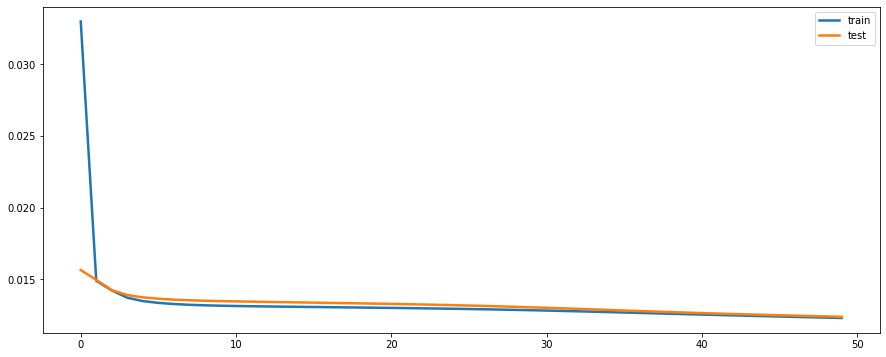

In [24]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [25]:
testPredict = model.predict(test_X)
testPredict = testPredict.ravel()

In [26]:
y_test_true = test[:,5]

In [28]:
poll = np.array(df["O3_Target"])

meanop = poll.mean()
stdop = poll.std()

y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

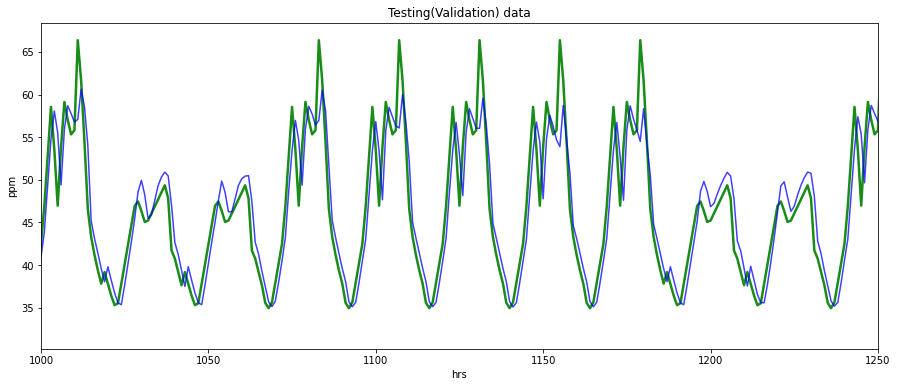

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 3.6423056


In [32]:
"""
CSV = pd.DataFrame({
    "actual": test_y,
    "lstm" : testPredict

})

CSV.to_csv("1-Hourly_ME_Only_O3_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv", index=False)
"""

'\nCSV = pd.DataFrame({\n    "actual": test_y,\n    "lstm" : testPredict\n\n})\n\nCSV.to_csv("1-Hourly_ME_Only_O3_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv", index=False)\n'

In [31]:
header = ['actual', 'lstm']
output_file = "1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv"
with open(output_file, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(header)
    for w in range(len(y_test_true)):
      csvwriter.writerow([y_test_true[w], testPredict[w]])

In [33]:
"""
from google.colab import files
files.download('1-Hourly_E_Only_O3_Target-Train.csv')
files.download('1-Hourly_E_Only_O3_Target-Test.csv')
files.download('1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv')
"""

"\nfrom google.colab import files\nfiles.download('1-Hourly_E_Only_O3_Target-Train.csv')\nfiles.download('1-Hourly_E_Only_O3_Target-Test.csv')\nfiles.download('1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv')\n"

## **Ada Boost Regressor**

In [34]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [35]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [36]:
param_grid = {'n_estimators': [10,100, 200, 300, 400]}
abr = GridSearchCV(AdaBoostRegressor(random_state=0), param_grid)  
abr.fit(train_X, train_y)
testPredict = abr.predict(test_X)

In [37]:
poll = np.array(df["O3_Target"])

meanop = poll.mean()
stdop = poll.std()

#y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

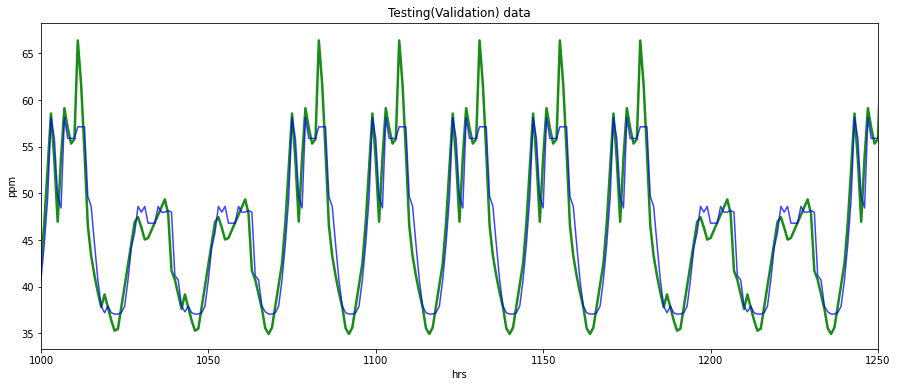

In [38]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [39]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 3.5738044557205577


In [40]:
CSV = pd.DataFrame({
    "actual": test_y,
    "adaboost" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_AdaBoost.csv", index=False)

## **XGBoost**

In [41]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [42]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(train_X, train_y,
        eval_set=[(train_X, train_y), (test_X, test_y)],
        early_stopping_rounds=50,
       verbose=False)
testPredict = reg.predict(test_X)

[15:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
poll = np.array(df["O3_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

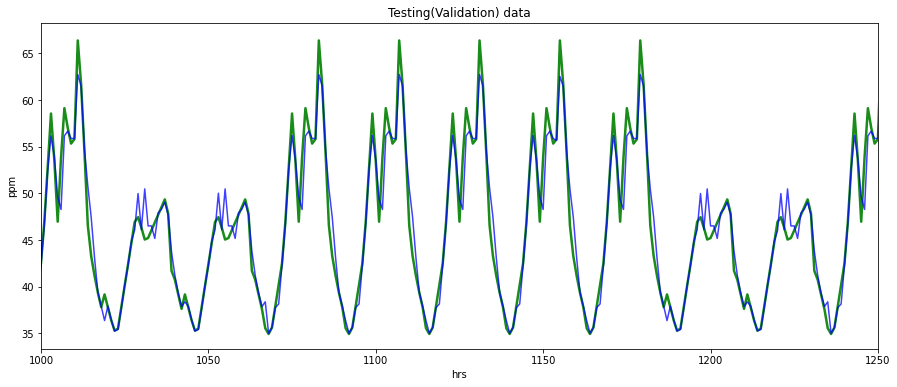

In [45]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 2.859639


In [47]:
CSV = pd.DataFrame({
    "actual": test_y,
    "xgboost" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_XGBoost.csv", index=False)

## **SVR**

In [48]:
from sklearn.svm import SVR

In [49]:
svr = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
svr.fit(train_X, train_y)
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
testPredict = svr.predict(test_X)

In [50]:
poll = np.array(df["O3_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

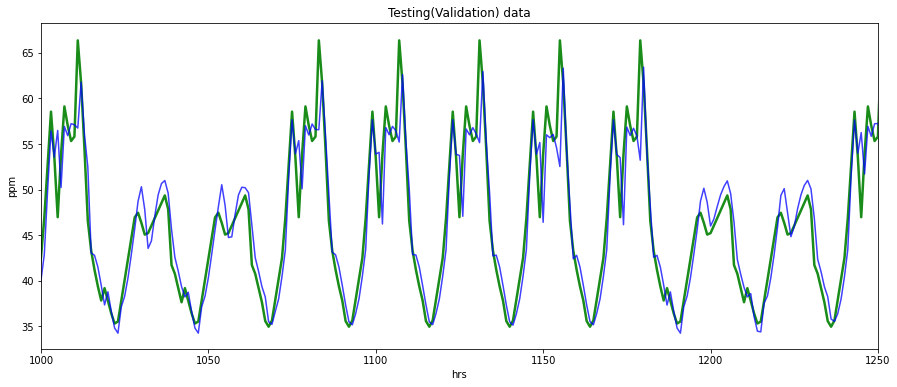

In [51]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [52]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 3.509473850628786


In [53]:
CSV = pd.DataFrame({
    "actual": test_y,
    "svr" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_SVR.csv", index=False)

## **Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression # OLS algorithm

In [55]:
ols = LinearRegression()
ols.fit(train_X, train_y)
testPredict = ols.predict(test_X)

In [56]:
poll = np.array(df["O3_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

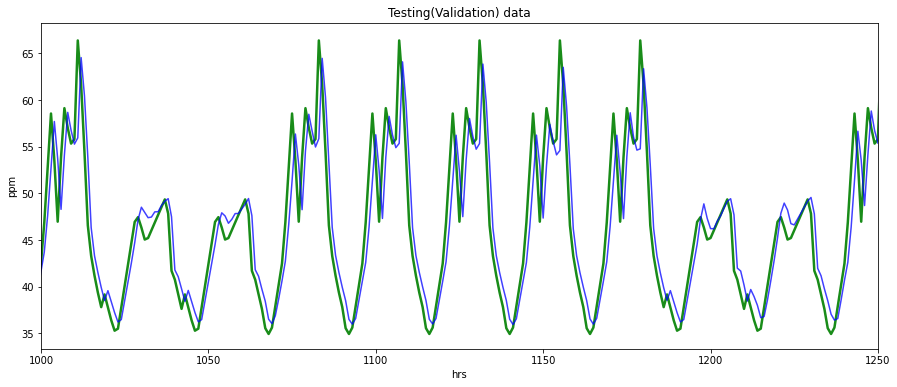

In [57]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [58]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 3.9308047


In [59]:
CSV = pd.DataFrame({
    "actual": test_y,
    "svr" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_LR.csv", index=False)

## **Lasso**

In [60]:
from sklearn.linear_model import Lasso # Lasso algorithm

In [61]:
# defining parameter range 
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 10, 100]}  
lasso = GridSearchCV(Lasso(), param_grid) 
lasso.fit(train_X, train_y)
testPredict = lasso.predict(test_X)

In [63]:
poll = np.array(df["O3_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

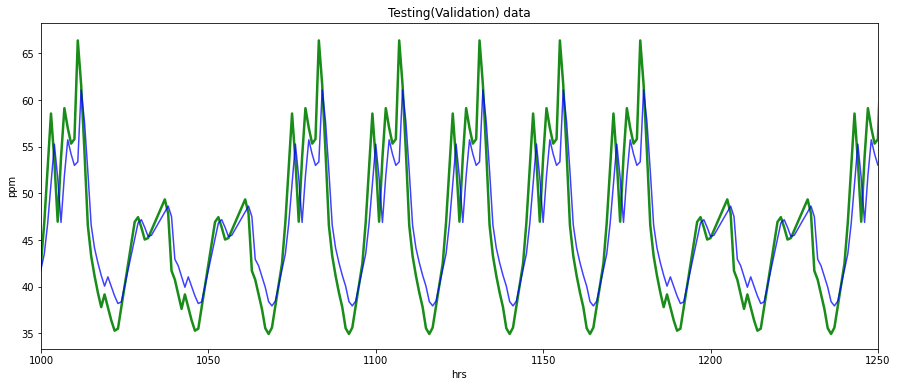

In [64]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [65]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 4.1843886


In [66]:
CSV = pd.DataFrame({
    "actual": test_y,
    "lasso" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_Lasso.csv", index=False)

## **Ridge**

In [67]:
from sklearn.linear_model import Ridge # Ridge algorithm

In [68]:
param_grid = {'alpha': [0.1, 0.5, 1, 10, 100]}  
ridge = GridSearchCV(Ridge(), param_grid)
ridge.fit(train_X, train_y)
testPredict = ridge.predict(test_X)

In [69]:
testPredict = testPredict*stdop + meanop

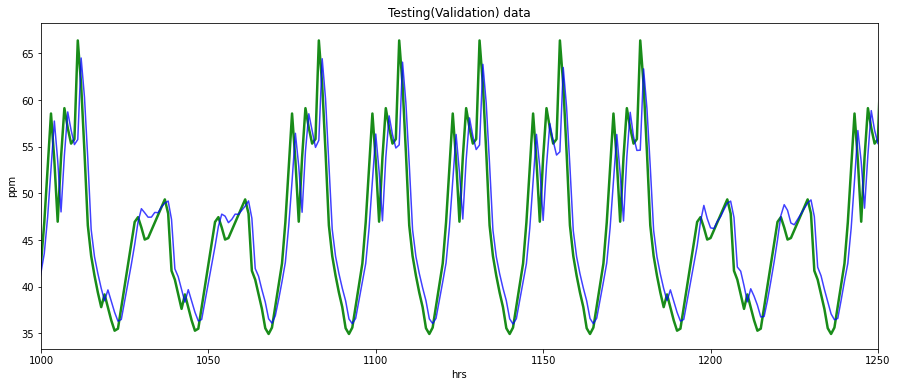

In [70]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [71]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 3.936858


In [72]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_Ridge.csv", index=False)

## **Elastic Net**

In [73]:
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

In [74]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]}  
   
en = GridSearchCV(ElasticNet(), param_grid) 
en.fit(train_X, train_y)
testPredict = en.predict(test_X)

In [75]:
testPredict = testPredict*stdop + meanop

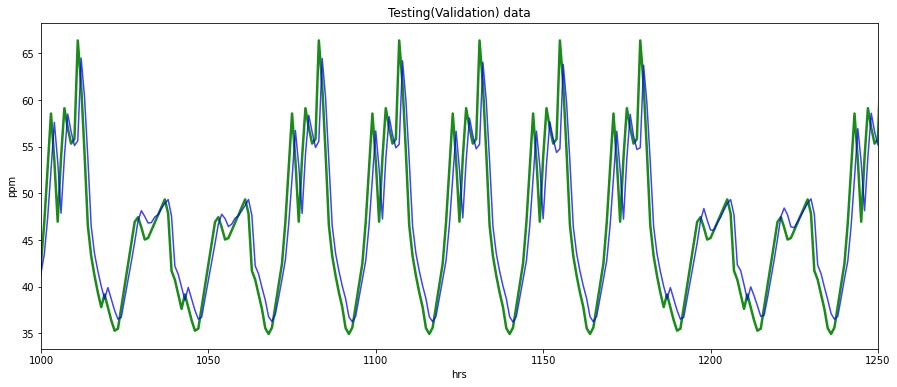

In [76]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [77]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 3.949775


In [79]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_Elastic_Net.csv", index=False)

## **Gradient Boosting Regressor**

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
SEED = 1
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)
gbr.fit(train_X, train_y)
testPredict = gbr.predict(test_X)

In [82]:
testPredict = testPredict*stdop + meanop

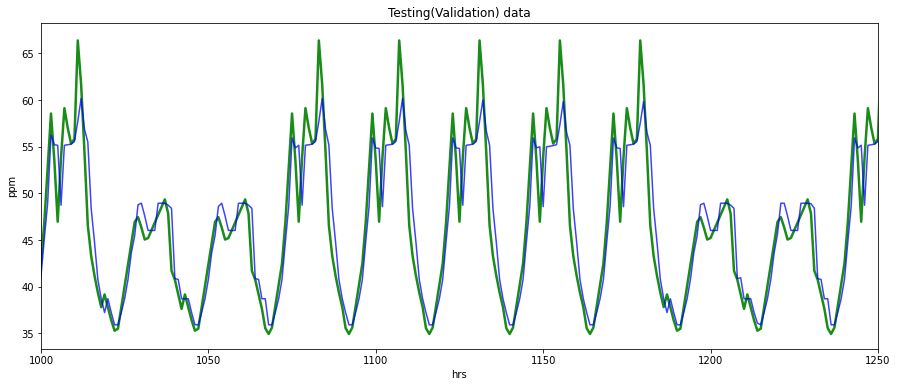

In [83]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [84]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 3.6170176667334206


In [85]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_GB.csv", index=False)

## **Regression Tree**

In [86]:
from sklearn.tree import DecisionTreeRegressor 

In [87]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(train_X, train_y)
testPredict = regressor.predict(test_X)

In [88]:
testPredict = testPredict*stdop + meanop

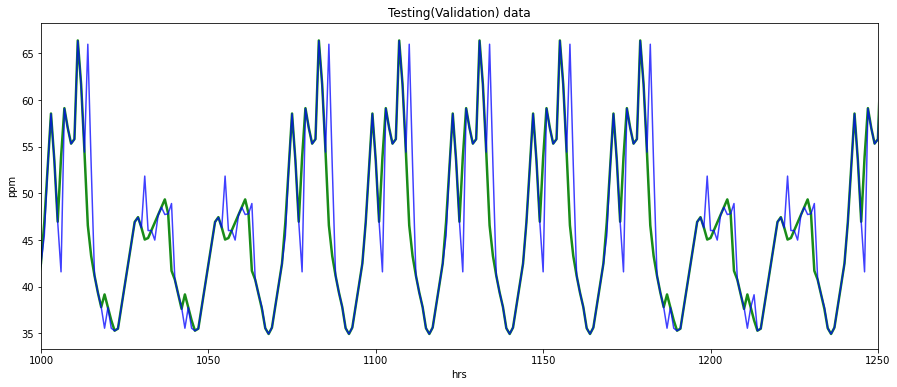

In [89]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [90]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 5.121041260471651


In [91]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_RT.csv", index=False)

## **Bi-LSTM**

In [92]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.models import Sequential

In [93]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(18396, 1, 5) (18396,) (7907, 1, 5) (7907,)


In [94]:
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
205/205 - 9s - loss: 0.0285 - val_loss: 0.0154 - 9s/epoch - 45ms/step
Epoch 2/50
205/205 - 1s - loss: 0.0146 - val_loss: 0.0147 - 1s/epoch - 5ms/step
Epoch 3/50
205/205 - 1s - loss: 0.0140 - val_loss: 0.0140 - 1s/epoch - 5ms/step
Epoch 4/50
205/205 - 1s - loss: 0.0136 - val_loss: 0.0138 - 1s/epoch - 5ms/step
Epoch 5/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0137 - 1s/epoch - 5ms/step
Epoch 6/50
205/205 - 1s - loss: 0.0133 - val_loss: 0.0136 - 1s/epoch - 5ms/step
Epoch 7/50
205/205 - 1s - loss: 0.0132 - val_loss: 0.0136 - 1s/epoch - 5ms/step
Epoch 8/50
205/205 - 1s - loss: 0.0132 - val_loss: 0.0135 - 981ms/epoch - 5ms/step
Epoch 9/50
205/205 - 1s - loss: 0.0132 - val_loss: 0.0135 - 904ms/epoch - 4ms/step
Epoch 10/50
205/205 - 1s - loss: 0.0132 - val_loss: 0.0135 - 942ms/epoch - 5ms/step
Epoch 11/50
205/205 - 1s - loss: 0.0132 - val_loss: 0.0135 - 964ms/epoch - 5ms/step
Epoch 12/50
205/205 - 1s - loss: 0.0131 - val_loss: 0.0135 - 971ms/epoch - 5ms/step
Epoch 13/50
205/205 -

In [95]:
testPredict = model.predict(test_X)
testPredict = testPredict.ravel()

In [96]:
testPredict = testPredict*stdop + meanop

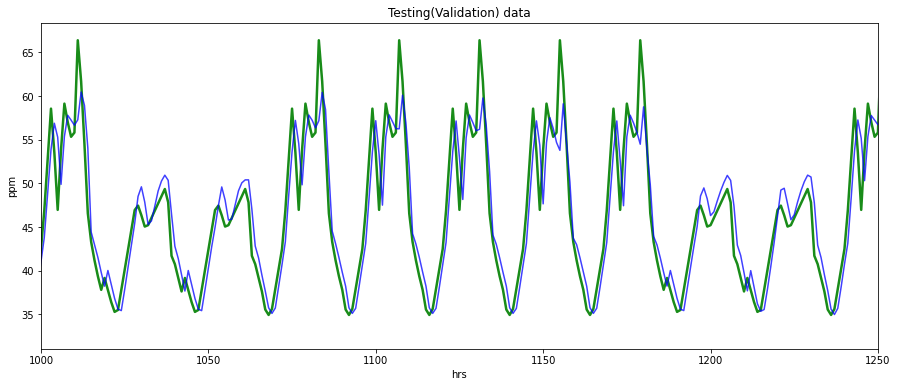

In [97]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [98]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("1-Hourly_E_Only_O3_Actual_Test_Data_and_Predicted_Data_by_Bi-LSTM.csv", index=False)

## **ANN**

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [100]:
# classifier = Sequential()
# classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
# classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
# classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TypeError: ignored

In [101]:
# classifier.fit(train_X, train_y, batch_size = 10, nb_epoch = 50)
# y_pred = classifier.predict(test_X)

TypeError: ignored

## **GRU**

## **RECURRENT NEURAL NETWORK**

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))

# **8 hr**

## **Importing Packages and Libraries**

In [102]:
from google.colab import files
filesuploaded = files.upload()

Saving 8-Hourly_E_Only_O3_Target.csv to 8-Hourly_E_Only_O3_Target.csv


In [103]:
df = pd.read_csv("8-Hourly_E_Only_O3_Target.csv")

In [104]:
# The function is defined with default parameters so that if you call it with just your data, it will construct a DataFrame with t-1 
# as X and t as y

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

## **Data Visualization**

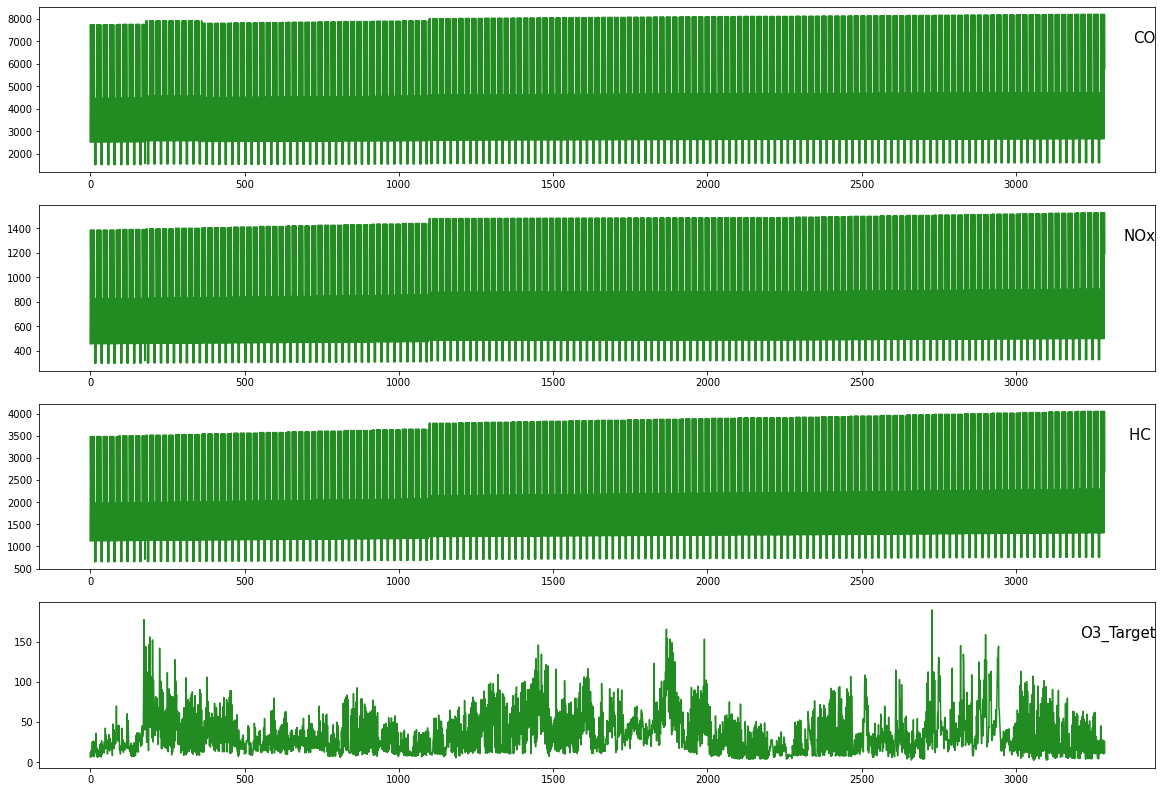

In [105]:
values = df.values

# specify columns to plot
groups = [1, 2, 3, 5]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

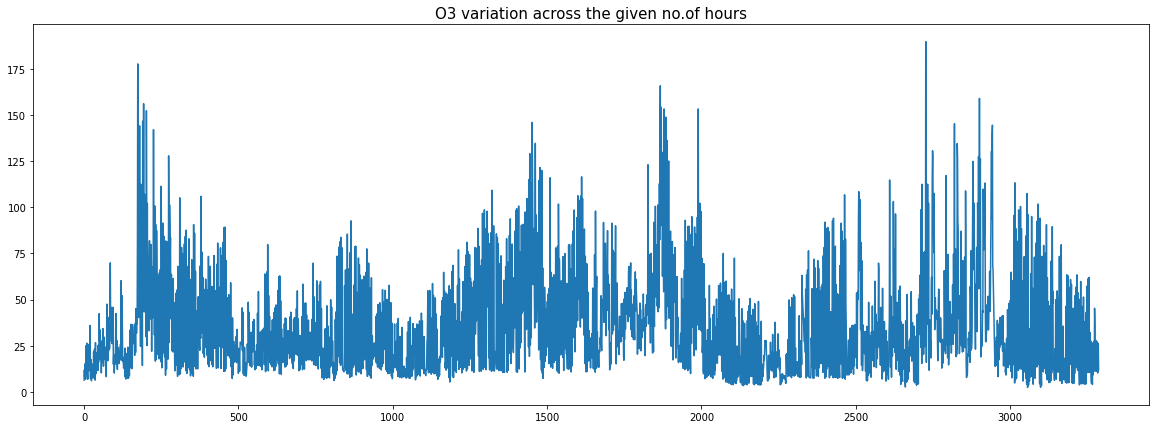

In [106]:
fig = plt.figure(figsize = (20,7))
plt.plot(df["O3_Target"])
plt.title("O3 variation across the given no.of hours", fontsize = 15)
plt.show()

## **Splitting the dataset : train.csv and test.csv**

In [107]:
# We train the model on the 1st 70% of the dataset and then test on the last 30% of the dataset
n_train_hours = (70/100)* 365 * 3 * 3
n_train_hours = math.ceil(n_train_hours)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [108]:
# train_file = "8-Hourly_E_Only_PM2.5_Target-Train.csv"
# test_file = "8-Hourly_E_Only_PM2.5_Target-Test.csv"
# with open(train_file, 'w') as csvfile: 
#     # creating a csv writer object 
#     csvwriter = csv.writer(csvfile)   
#     csvwriter.writerows(train)

# with open(test_file, 'w') as csvfile: 
#     # creating a csv writer object 
#     csvwriter = csv.writer(csvfile)   
#     csvwriter.writerows(test)

In [109]:
df

,Date,CO,NOx,HC,PM,O3_Target
0,2008-01-01 00:00:00,2531.643125,456.416875,1126.710625,22.069875,6.28250
1,2008-01-01 08:00:00,7734.362750,1384.192250,3484.156875,67.961750,11.76125
2,2008-01-01 16:00:00,5492.531000,1090.800250,2327.553375,48.658875,7.83125
3,2008-01-02 00:00:00,2531.643125,456.416875,1126.710625,22.069875,12.38500
4,2008-01-02 08:00:00,7734.362750,1384.192250,3484.156875,67.961750,15.24250
...,...,...,...,...,...,...
3283,2010-12-30 08:00:00,8195.106125,1524.935625,4052.355500,87.126250,26.71250
3284,2010-12-30 16:00:00,5788.549625,1193.723625,2687.100750,62.157000,10.13625
3285,2010-12-31 00:00:00,2669.679750,498.303125,1306.443750,28.261125,11.74250
3286,2010-12-31 08:00:00,8195.106125,1524.935625,4052.355500,87.126250,26.19000


In [110]:
del df["Date"]

## **Scaling and reframing the dataset**

In [111]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [112]:
# Scaling the entire dataset

dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [113]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

(3287, 10)


In [114]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)  \
1   0.151148   0.129508   0.139380   0.116558   0.021457  0.930943  0.885340   
2   0.930943   0.885340   0.832856   0.739753   0.050638  0.594932  0.646322   
3   0.594932   0.646322   0.492625   0.477627   0.029706  0.151148  0.129508   
4   0.151148   0.129508   0.139380   0.116558   0.053961  0.930943  0.885340   
5   0.930943   0.885340   0.832856   0.739753   0.069181  0.594932  0.646322   

    var3(t)   var4(t)   var5(t)  
1  0.832856  0.739753  0.050638  
2  0.492625  0.477627  0.029706  
3  0.139380  0.116558  0.053961  
4  0.832856  0.739753  0.069181  
5  0.492625  0.477627  0.024073  


In [115]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)'],
      dtype='object')

In [116]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.151148   0.129508   0.139380   0.116558   0.021457  0.930943
2   0.930943   0.885340   0.832856   0.739753   0.050638  0.594932
3   0.594932   0.646322   0.492625   0.477627   0.029706  0.151148
4   0.151148   0.129508   0.139380   0.116558   0.053961  0.930943
5   0.930943   0.885340   0.832856   0.739753   0.069181  0.594932


In [ ]:
values = reframed.values

# We train the model on the 70% of scaled and reframed data and then test on the last 30% (which is also scaled and reframed)
n_train_hours = (70/100)* 3289
n_train_hours = math.ceil(n_train_hours)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


## **LSTM**

In [ ]:
# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(18396, 1, 5) (18396,) (7907, 1, 5) (7907,)


In [ ]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
205/205 - 3s - loss: 0.0330 - val_loss: 0.0164 - 3s/epoch - 16ms/step
Epoch 2/50
205/205 - 1s - loss: 0.0153 - val_loss: 0.0157 - 616ms/epoch - 3ms/step
Epoch 3/50
205/205 - 1s - loss: 0.0147 - val_loss: 0.0151 - 520ms/epoch - 3ms/step
Epoch 4/50
205/205 - 1s - loss: 0.0141 - val_loss: 0.0146 - 568ms/epoch - 3ms/step
Epoch 5/50
205/205 - 1s - loss: 0.0138 - val_loss: 0.0143 - 518ms/epoch - 3ms/step
Epoch 6/50
205/205 - 1s - loss: 0.0136 - val_loss: 0.0142 - 816ms/epoch - 4ms/step
Epoch 7/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0142 - 826ms/epoch - 4ms/step
Epoch 8/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0141 - 760ms/epoch - 4ms/step
Epoch 9/50
205/205 - 0s - loss: 0.0134 - val_loss: 0.0141 - 500ms/epoch - 2ms/step
Epoch 10/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 574ms/epoch - 3ms/step
Epoch 11/50
205/205 - 0s - loss: 0.0134 - val_loss: 0.0141 - 499ms/epoch - 2ms/step
Epoch 12/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 513ms/epoch - 3ms/step
Epo

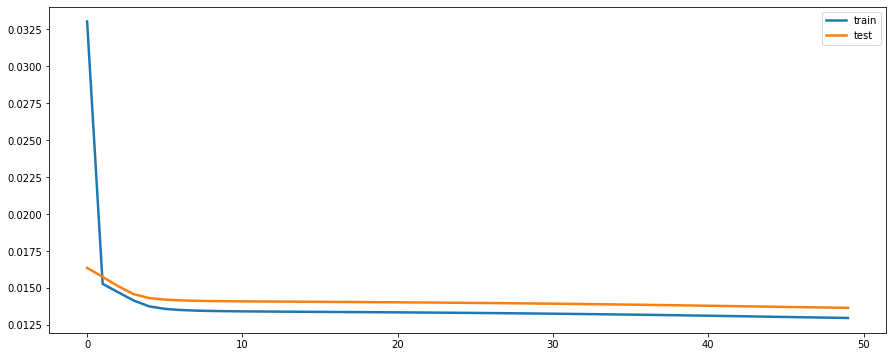

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [ ]:
testPredict = model.predict(test_X)
testPredict = testPredict.ravel()

In [ ]:
y_test_true = test[:,5]

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

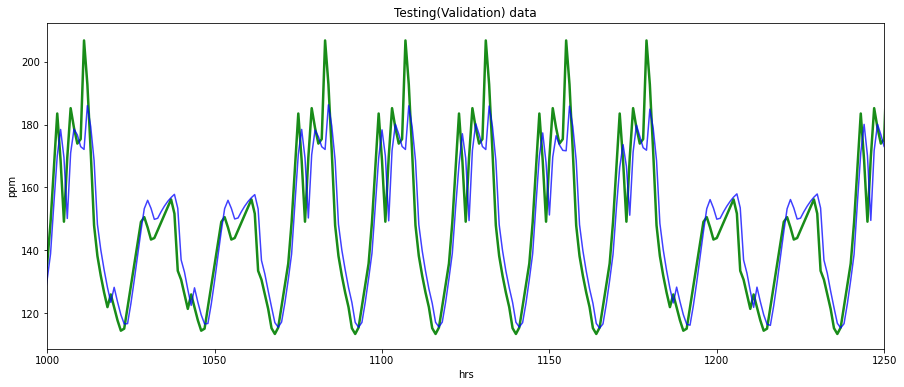

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.161746


In [ ]:
"""
CSV = pd.DataFrame({
    "actual": test_y,
    "lstm" : testPredict

})

CSV.to_csv("8-Hourly_ME_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv", index=False)
"""

'\nCSV = pd.DataFrame({\n    "actual": test_y,\n    "lstm" : testPredict\n\n})\n\nCSV.to_csv("1-Hourly_ME_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv", index=False)\n'

In [ ]:
header = ['actual', 'lstm']
output_file = "8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv"
with open(output_file, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(header)
    for w in range(len(y_test_true)):
      csvwriter.writerow([y_test_true[w], testPredict[w]])

In [ ]:
"""
from google.colab import files
files.download('8-Hourly_E_Only_PM2.5_Target-Train.csv')
files.download('8-Hourly_E_Only_PM2.5_Target-Test.csv')
files.download('8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv')
"""

"\nfrom google.colab import files\nfiles.download('1-Hourly_E_Only_PM2.5_Target-Train.csv')\nfiles.download('1-Hourly_E_Only_PM2.5_Target-Test.csv')\nfiles.download('1-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv')\n"

## **Ada Boost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [ ]:
param_grid = {'n_estimators': [10,100, 200, 300, 400]}
abr = GridSearchCV(AdaBoostRegressor(random_state=0), param_grid)  
abr.fit(train_X, train_y)
testPredict = abr.predict(test_X)

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

#y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

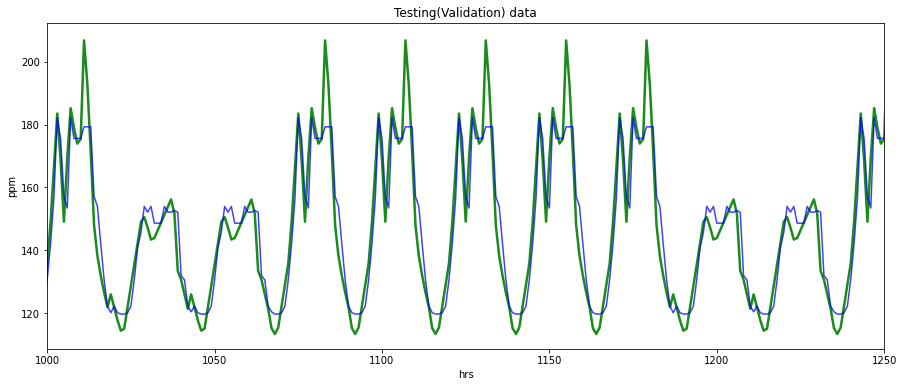

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 10.61861140093678


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "adaboost" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_AdaBoost.csv", index=False)

## **XGBoost**

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(train_X, train_y,
        eval_set=[(train_X, train_y), (test_X, test_y)],
        early_stopping_rounds=50,
       verbose=False)
testPredict = reg.predict(test_X)

[03:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

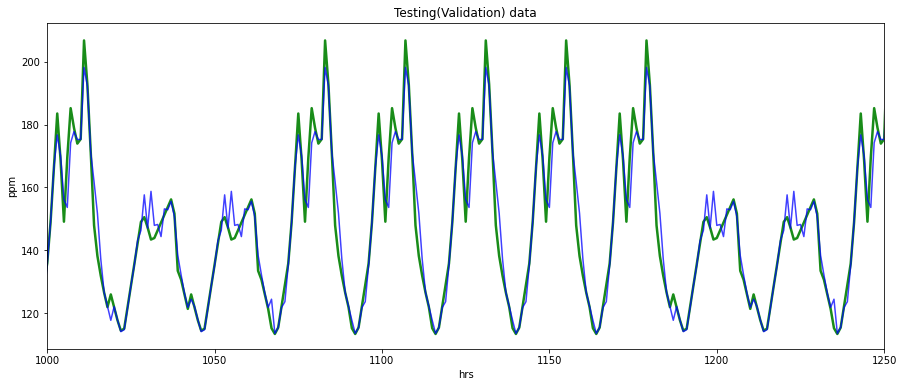

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 8.73497


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "xgboost" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_XGBoost.csv", index=False)

## **SVR**

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
svr.fit(train_X, train_y)
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
testPredict = svr.predict(test_X)

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

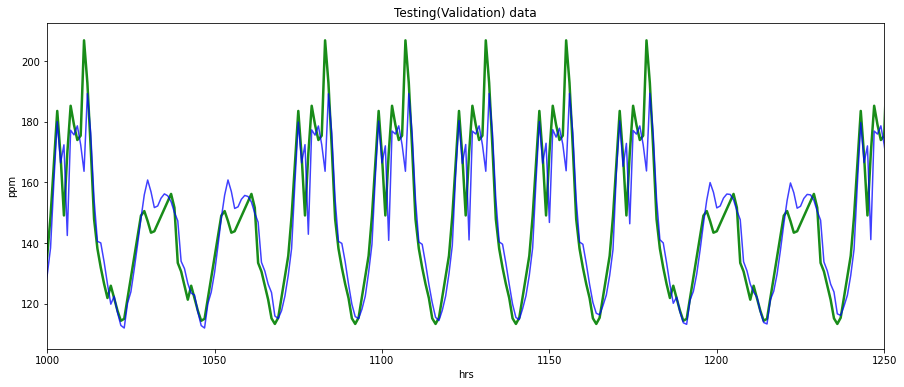

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.227710800953288


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "svr" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_SVR.csv", index=False)

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression # OLS algorithm

In [ ]:
ols = LinearRegression()
ols.fit(train_X, train_y)
testPredict = ols.predict(test_X)

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

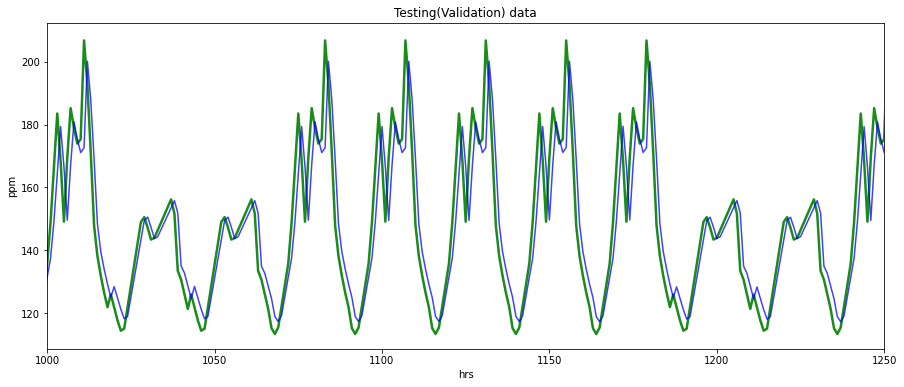

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.864108


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "svr" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LR.csv", index=False)

## **Lasso**

In [ ]:
from sklearn.linear_model import Lasso # Lasso algorithm

In [ ]:
# defining parameter range 
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 10, 100]}  
lasso = GridSearchCV(Lasso(), param_grid) 
lasso.fit(train_X, train_y)
testPredict = lasso.predict(test_X)

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

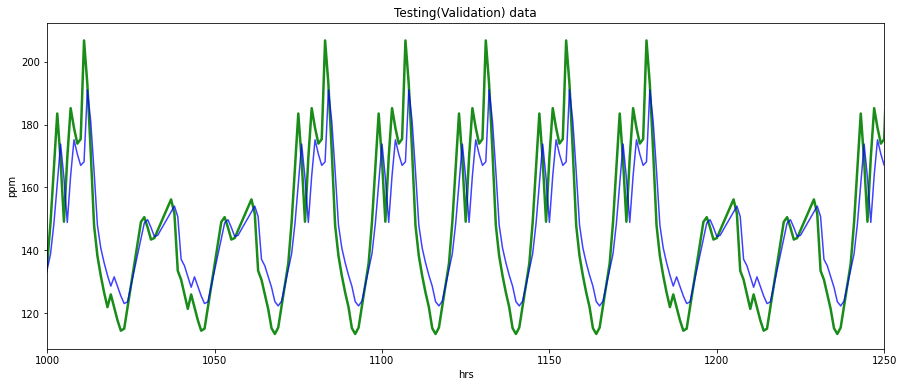

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 12.432801


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "lasso" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_Lasso.csv", index=False)

## **Ridge**

In [ ]:
from sklearn.linear_model import Ridge # Ridge algorithm

In [ ]:
param_grid = {'alpha': [0.1, 0.5, 1, 10, 100]}  
ridge = GridSearchCV(Ridge(), param_grid)
ridge.fit(train_X, train_y)
testPredict = ridge.predict(test_X)

In [ ]:
testPredict = testPredict*stdop + meanop

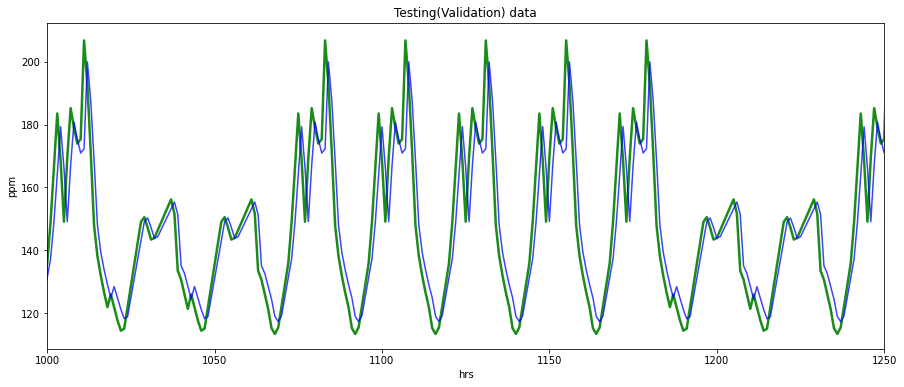

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.8683815


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_Ridge.csv", index=False)

## **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]}  
   
en = GridSearchCV(ElasticNet(), param_grid) 
en.fit(train_X, train_y)
testPredict = en.predict(test_X)

In [ ]:
testPredict = testPredict*stdop + meanop

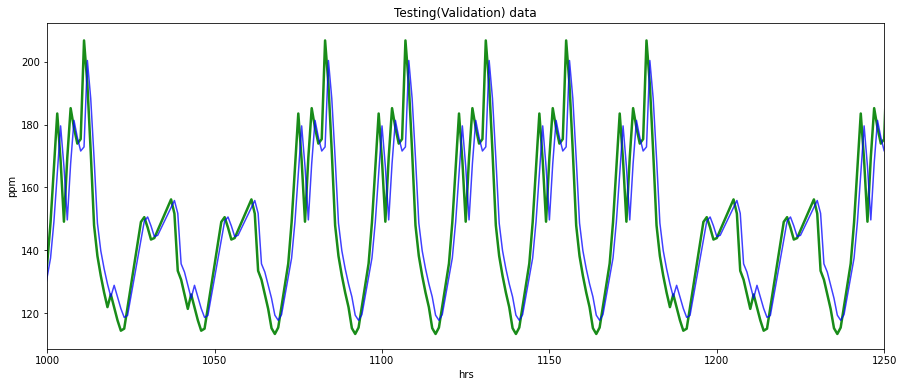

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.89141


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_Elastic_Net.csv", index=False)

## **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
SEED = 1
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)
gbr.fit(train_X, train_y)
testPredict = gbr.predict(test_X)

In [ ]:
testPredict = testPredict*stdop + meanop

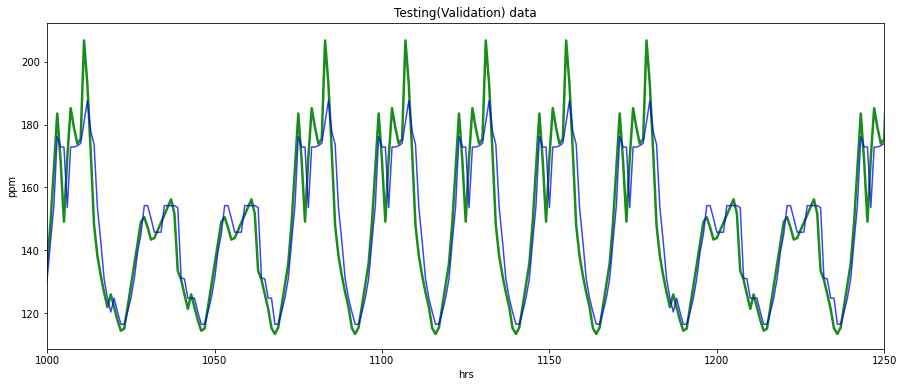

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 10.778192783632177


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_GB.csv", index=False)

## **Regression Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(train_X, train_y)
testPredict = regressor.predict(test_X)

In [ ]:
testPredict = testPredict*stdop + meanop

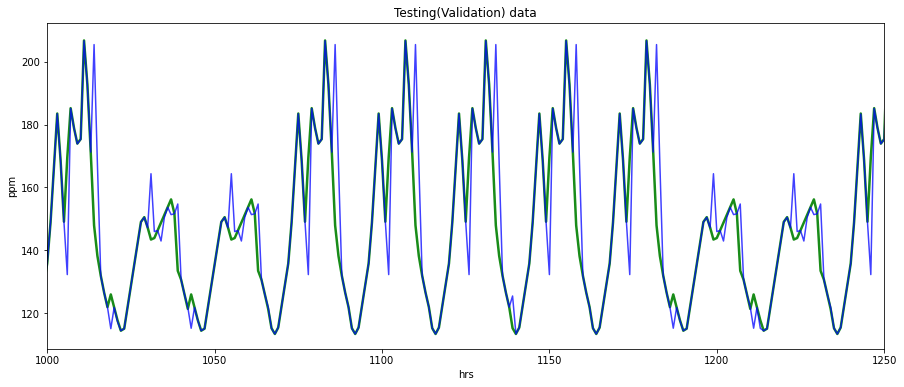

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 16.1626231302334


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_RT.csv", index=False)

## **Bi-LSTM**

In [ ]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.models import Sequential

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(18396, 1, 5) (18396,) (7907, 1, 5) (7907,)


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
205/205 - 5s - loss: 0.0294 - val_loss: 0.0160 - 5s/epoch - 27ms/step
Epoch 2/50
205/205 - 1s - loss: 0.0150 - val_loss: 0.0154 - 740ms/epoch - 4ms/step
Epoch 3/50
205/205 - 1s - loss: 0.0144 - val_loss: 0.0148 - 747ms/epoch - 4ms/step
Epoch 4/50
205/205 - 1s - loss: 0.0139 - val_loss: 0.0144 - 763ms/epoch - 4ms/step
Epoch 5/50
205/205 - 1s - loss: 0.0136 - val_loss: 0.0142 - 737ms/epoch - 4ms/step
Epoch 6/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0142 - 751ms/epoch - 4ms/step
Epoch 7/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0141 - 668ms/epoch - 3ms/step
Epoch 8/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 693ms/epoch - 3ms/step
Epoch 9/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 733ms/epoch - 4ms/step
Epoch 10/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 723ms/epoch - 4ms/step
Epoch 11/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 766ms/epoch - 4ms/step
Epoch 12/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 751ms/epoch - 4ms/step
Epo

In [ ]:
testPredict = model.predict(test_X)
testPredict = testPredict.ravel()

In [ ]:
testPredict = testPredict*stdop + meanop

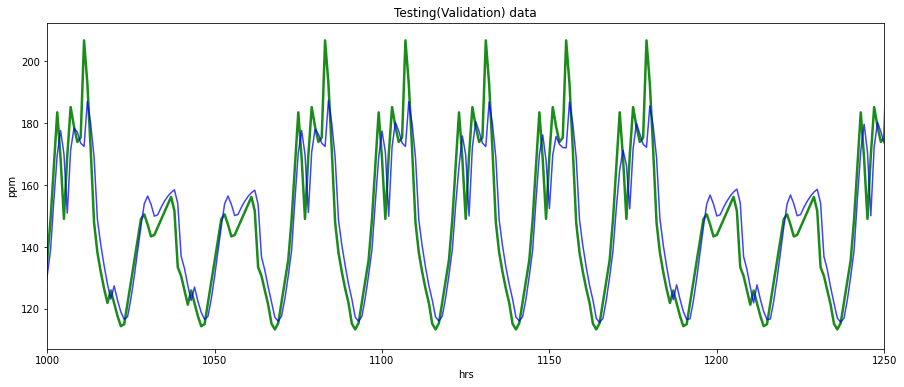

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_Bi-LSTM.csv", index=False)

## **ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TypeError: ignored

In [ ]:
classifier.fit(train_X, train_y, batch_size = 10, nb_epoch = 50)
y_pred = classifier.predict(test_X)

## **GRU**

## **RECURRENT NEURAL NETWORK**

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))

# **24 hr**

## **Importing Packages and Libraries**

In [ ]:
from google.colab import files
filesuploaded = files.upload()

Saving 1-Hourly_E_Only_PM2.5_Target.csv to 1-Hourly_E_Only_PM2.5_Target.csv


In [ ]:
df = pd.read_csv("24-Hourly_E_Only_PM2.5_Target.csv")

In [ ]:
# The function is defined with default parameters so that if you call it with just your data, it will construct a DataFrame with t-1 
# as X and t as y

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

## **Data Visualization**

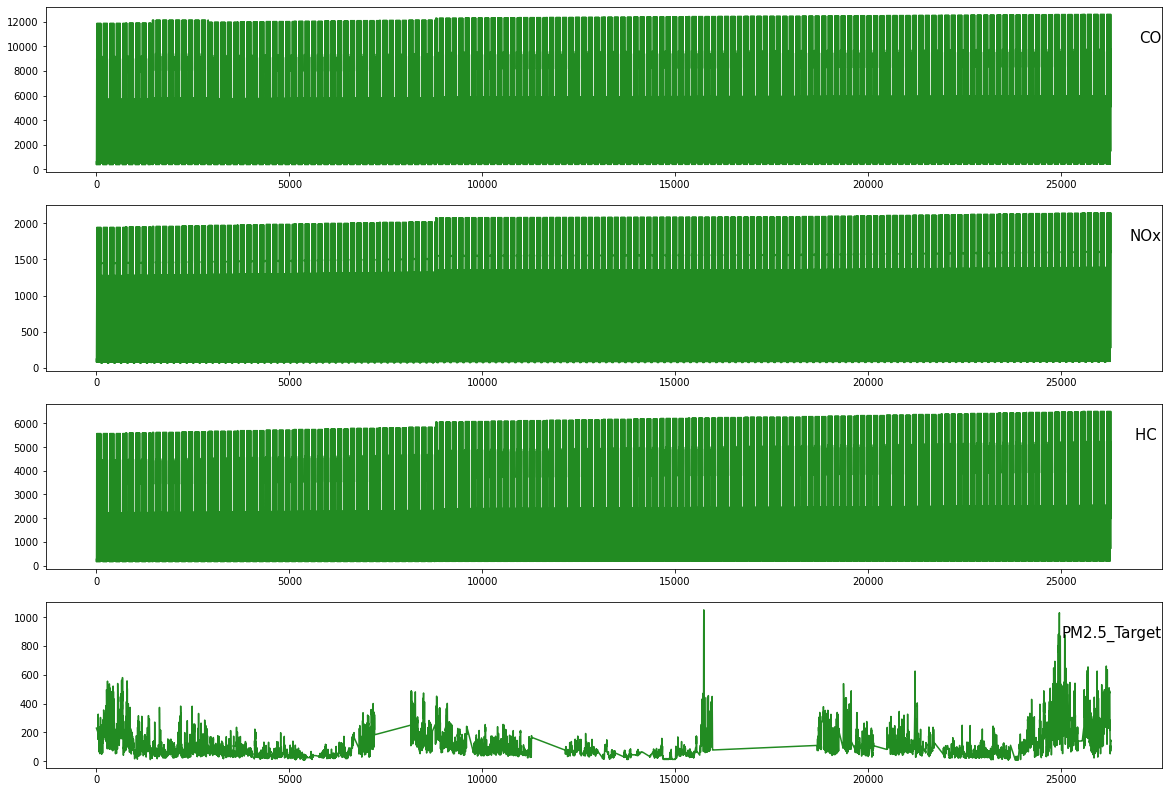

In [ ]:
values = df.values

# specify columns to plot
groups = [1, 2, 3, 5]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

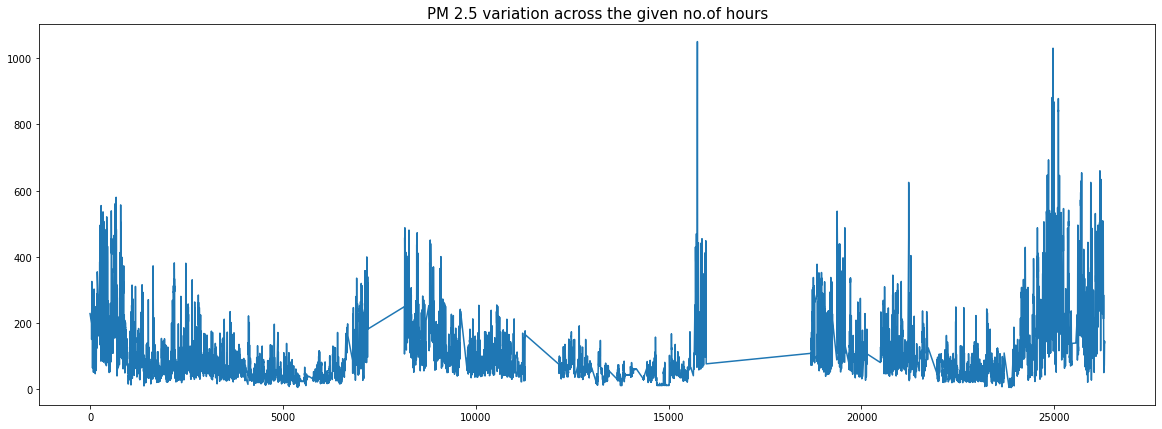

In [ ]:
fig = plt.figure(figsize = (20,7))
plt.plot(df["PM2.5_Target"])
plt.title("PM 2.5 variation across the given no.of hours", fontsize = 15)
plt.show()

## **Splitting the dataset : train.csv and test.csv**

In [ ]:
# We train the model on the 1st 70% of the dataset and then test on the last 30% of the dataset
n_train_hours = (70/100)* 365 * 24 * 3
n_train_hours = math.ceil(n_train_hours)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [ ]:
train_file = "24-Hourly_E_Only_PM2.5_Target-Train.csv"
test_file = "24-Hourly_E_Only_PM2.5_Target-Test.csv"
with open(train_file, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)   
    csvwriter.writerows(train)

with open(test_file, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)   
    csvwriter.writerows(test)

In [ ]:
df

,Date,CO,NOx,HC,PM,PM2.5_Target
0,2008-01-01 00:00:00,602.486,121.865,259.155,5.486,229.000000
1,2008-01-01 01:00:00,375.254,79.997,158.559,3.487,228.236842
2,2008-01-01 02:00:00,634.258,158.823,229.421,5.849,227.473684
3,2008-01-01 03:00:00,1480.128,317.279,593.550,13.159,226.710526
4,2008-01-01 04:00:00,2325.998,475.734,957.680,20.468,225.947368
...,...,...,...,...,...,...
26299,2010-12-31 19:00:00,4898.444,1285.198,1887.848,54.364,116.000000
26300,2010-12-31 20:00:00,3634.385,884.352,1500.129,39.918,132.000000
26301,2010-12-31 21:00:00,2815.672,633.633,1216.352,30.388,145.000000
26302,2010-12-31 22:00:00,2114.180,433.511,961.742,22.422,146.000000


In [ ]:
del df["Date"]

## **Scaling and reframing the dataset**

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Scaling the entire dataset

dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

(26303, 10)


In [ ]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)  \
1   0.018577   0.027073   0.015842   0.015478   0.213692  0.000000  0.006931   
2   0.000000   0.006931   0.000000   0.000000   0.212961  0.021174  0.044853   
3   0.021174   0.044853   0.011159   0.018289   0.212230  0.090326  0.121086   
4   0.090326   0.121086   0.068503   0.074889   0.211499  0.159477  0.197317   
5   0.159477   0.197317   0.125846   0.131481   0.210768  0.228694  0.273500   

    var3(t)   var4(t)   var5(t)  
1  0.000000  0.000000  0.212961  
2  0.011159  0.018289  0.212230  
3  0.068503  0.074889  0.211499  
4  0.125846  0.131481  0.210768  
5  0.183286  0.188119  0.210037  


In [ ]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)'],
      dtype='object')

In [ ]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.018577   0.027073   0.015842   0.015478   0.213692  0.000000
2   0.000000   0.006931   0.000000   0.000000   0.212961  0.021174
3   0.021174   0.044853   0.011159   0.018289   0.212230  0.090326
4   0.090326   0.121086   0.068503   0.074889   0.211499  0.159477
5   0.159477   0.197317   0.125846   0.131481   0.210768  0.228694


In [ ]:
values = reframed.values

# We train the model on the 70% of scaled and reframed data and then test on the last 30% (which is also scaled and reframed)
n_train_hours = (70/100)* 3289
n_train_hours = math.ceil(n_train_hours)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


## **LSTM**

In [ ]:
# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(18396, 1, 5) (18396,) (7907, 1, 5) (7907,)


In [ ]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
205/205 - 3s - loss: 0.0330 - val_loss: 0.0164 - 3s/epoch - 16ms/step
Epoch 2/50
205/205 - 1s - loss: 0.0153 - val_loss: 0.0157 - 616ms/epoch - 3ms/step
Epoch 3/50
205/205 - 1s - loss: 0.0147 - val_loss: 0.0151 - 520ms/epoch - 3ms/step
Epoch 4/50
205/205 - 1s - loss: 0.0141 - val_loss: 0.0146 - 568ms/epoch - 3ms/step
Epoch 5/50
205/205 - 1s - loss: 0.0138 - val_loss: 0.0143 - 518ms/epoch - 3ms/step
Epoch 6/50
205/205 - 1s - loss: 0.0136 - val_loss: 0.0142 - 816ms/epoch - 4ms/step
Epoch 7/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0142 - 826ms/epoch - 4ms/step
Epoch 8/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0141 - 760ms/epoch - 4ms/step
Epoch 9/50
205/205 - 0s - loss: 0.0134 - val_loss: 0.0141 - 500ms/epoch - 2ms/step
Epoch 10/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 574ms/epoch - 3ms/step
Epoch 11/50
205/205 - 0s - loss: 0.0134 - val_loss: 0.0141 - 499ms/epoch - 2ms/step
Epoch 12/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 513ms/epoch - 3ms/step
Epo

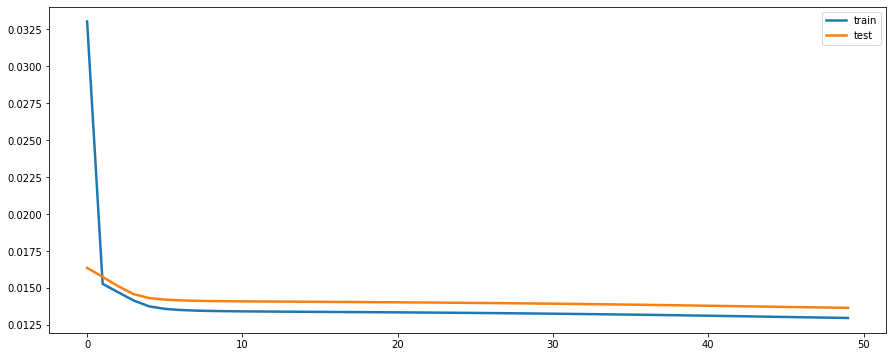

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [ ]:
testPredict = model.predict(test_X)
testPredict = testPredict.ravel()

In [ ]:
y_test_true = test[:,5]

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

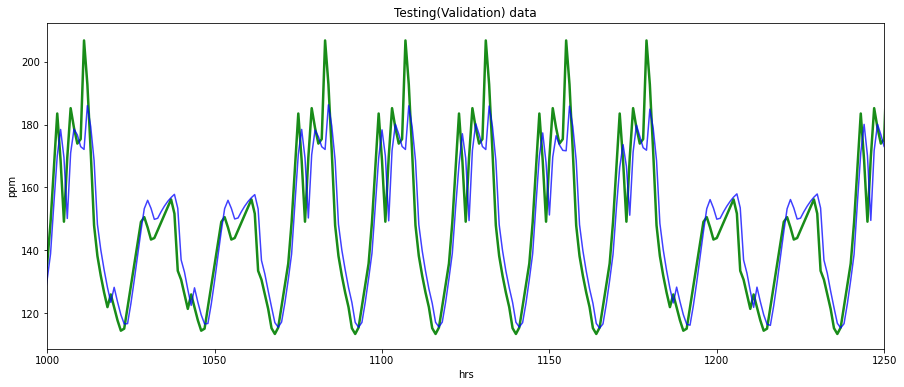

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.161746


In [ ]:
"""
CSV = pd.DataFrame({
    "actual": test_y,
    "lstm" : testPredict

})

CSV.to_csv("24-Hourly_ME_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv", index=False)
"""

'\nCSV = pd.DataFrame({\n    "actual": test_y,\n    "lstm" : testPredict\n\n})\n\nCSV.to_csv("1-Hourly_ME_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv", index=False)\n'

In [ ]:
header = ['actual', 'lstm']
output_file = "24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv"
with open(output_file, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(header)
    for w in range(len(y_test_true)):
      csvwriter.writerow([y_test_true[w], testPredict[w]])

In [ ]:
"""
from google.colab import files
files.download('24-Hourly_E_Only_PM2.5_Target-Train.csv')
files.download('24-Hourly_E_Only_PM2.5_Target-Test.csv')
files.download('24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv')
"""

"\nfrom google.colab import files\nfiles.download('1-Hourly_E_Only_PM2.5_Target-Train.csv')\nfiles.download('1-Hourly_E_Only_PM2.5_Target-Test.csv')\nfiles.download('1-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LSTM.csv')\n"

## **Ada Boost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [ ]:
param_grid = {'n_estimators': [10,100, 200, 300, 400]}
abr = GridSearchCV(AdaBoostRegressor(random_state=0), param_grid)  
abr.fit(train_X, train_y)
testPredict = abr.predict(test_X)

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

#y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

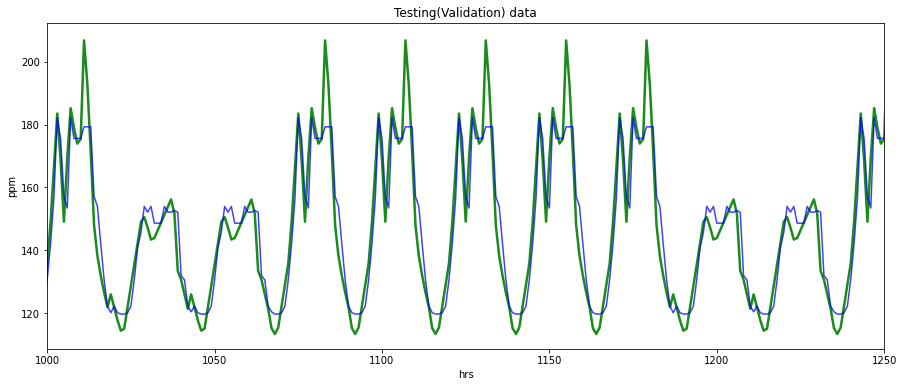

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 10.61861140093678


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "adaboost" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_AdaBoost.csv", index=False)

## **XGBoost**

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(train_X, train_y,
        eval_set=[(train_X, train_y), (test_X, test_y)],
        early_stopping_rounds=50,
       verbose=False)
testPredict = reg.predict(test_X)

[03:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

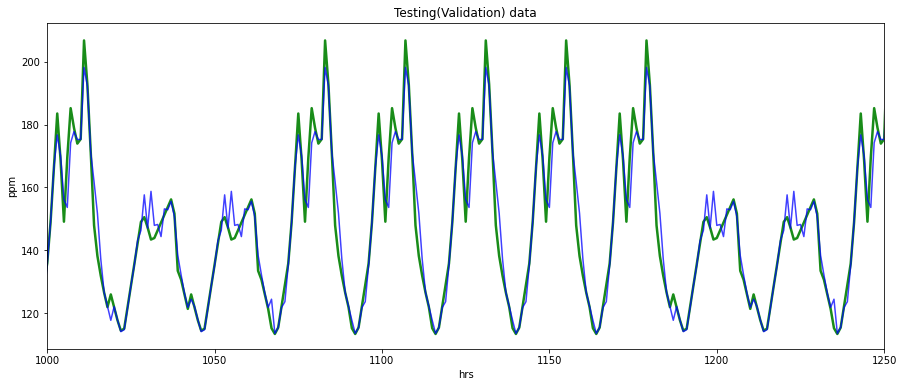

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 8.73497


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "xgboost" : testPredict

})

CSV.to_csv("24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_XGBoost.csv", index=False)

## **SVR**

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
svr.fit(train_X, train_y)
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
testPredict = svr.predict(test_X)

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

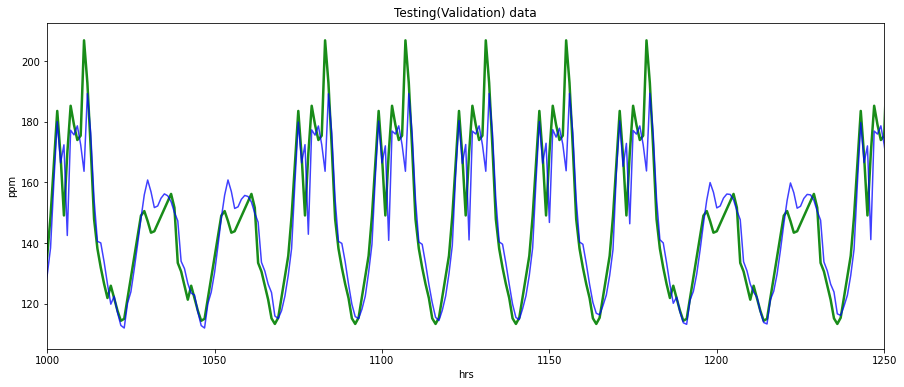

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.227710800953288


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "svr" : testPredict

})

CSV.to_csv("24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_SVR.csv", index=False)

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression # OLS algorithm

In [ ]:
ols = LinearRegression()
ols.fit(train_X, train_y)
testPredict = ols.predict(test_X)

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

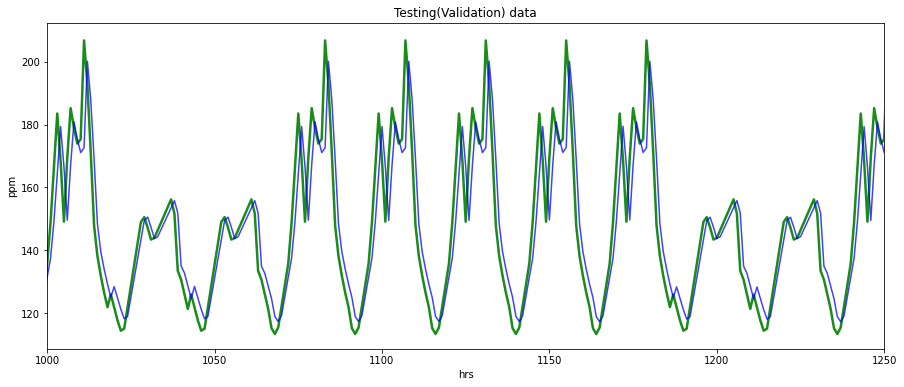

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.864108


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "svr" : testPredict

})

CSV.to_csv("24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_LR.csv", index=False)

## **Lasso**

In [ ]:
from sklearn.linear_model import Lasso # Lasso algorithm

In [ ]:
# defining parameter range 
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 10, 100]}  
lasso = GridSearchCV(Lasso(), param_grid) 
lasso.fit(train_X, train_y)
testPredict = lasso.predict(test_X)

In [ ]:
poll = np.array(df["PM2.5_Target"])

meanop = poll.mean()
stdop = poll.std()

testPredict = testPredict*stdop + meanop

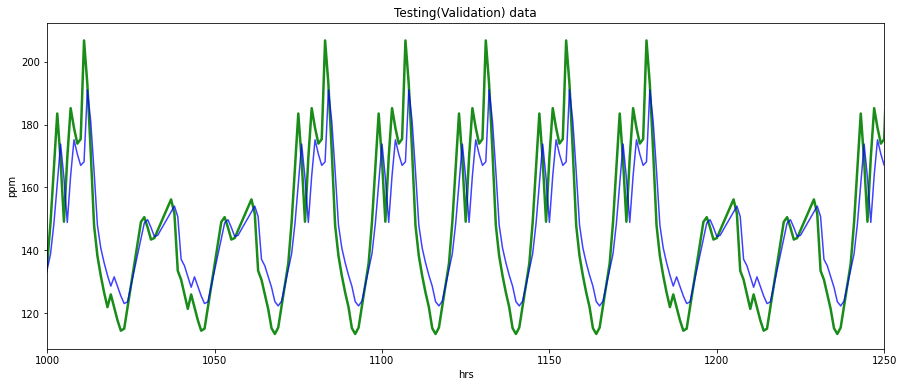

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 12.432801


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "lasso" : testPredict

})

CSV.to_csv("24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_Lasso.csv", index=False)

## **Ridge**

In [ ]:
from sklearn.linear_model import Ridge # Ridge algorithm

In [ ]:
param_grid = {'alpha': [0.1, 0.5, 1, 10, 100]}  
ridge = GridSearchCV(Ridge(), param_grid)
ridge.fit(train_X, train_y)
testPredict = ridge.predict(test_X)

In [ ]:
testPredict = testPredict*stdop + meanop

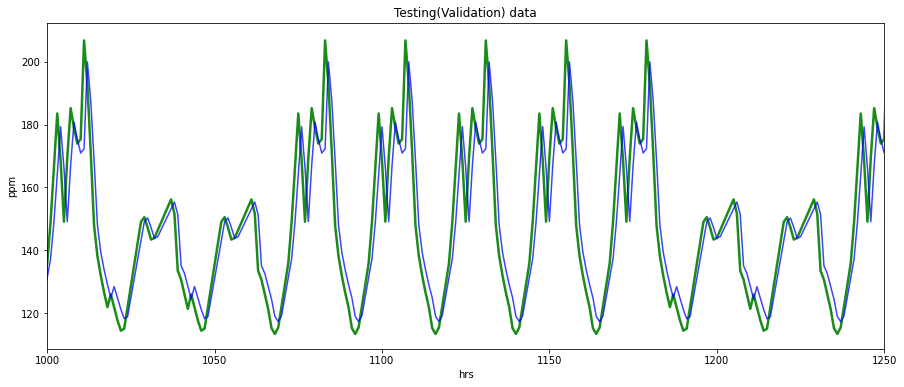

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.8683815


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_Ridge.csv", index=False)

## **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]}  
   
en = GridSearchCV(ElasticNet(), param_grid) 
en.fit(train_X, train_y)
testPredict = en.predict(test_X)

In [ ]:
testPredict = testPredict*stdop + meanop

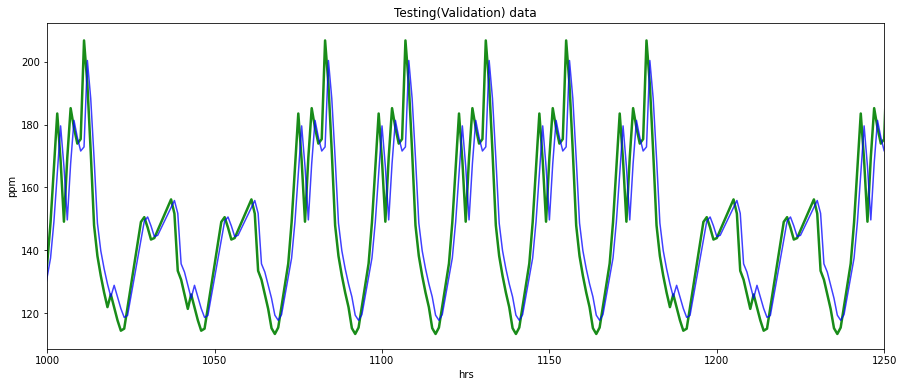

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 11.89141


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_Elastic_Net.csv", index=False)

## **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
SEED = 1
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)
gbr.fit(train_X, train_y)
testPredict = gbr.predict(test_X)

In [ ]:
testPredict = testPredict*stdop + meanop

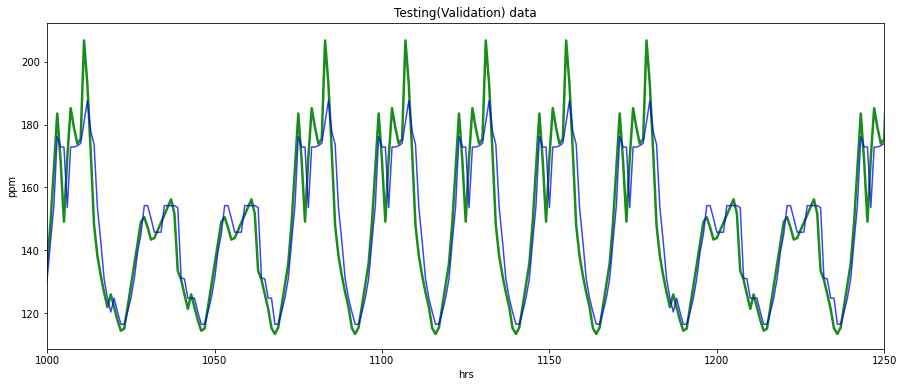

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 10.778192783632177


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("8-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_GB.csv", index=False)

## **Regression Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(train_X, train_y)
testPredict = regressor.predict(test_X)

In [ ]:
testPredict = testPredict*stdop + meanop

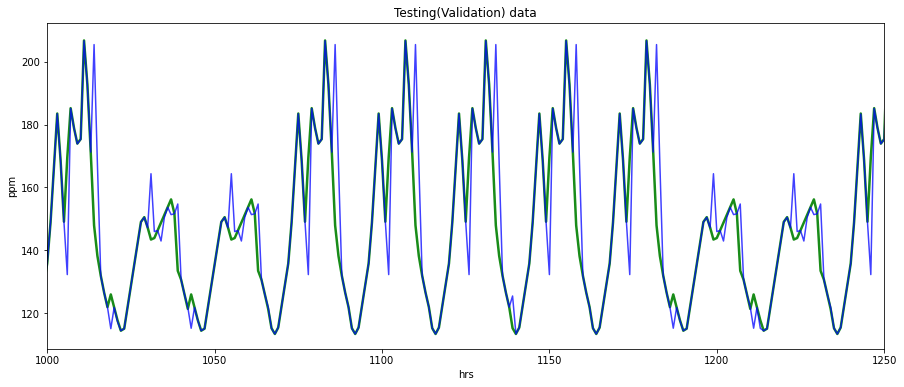

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 16.1626231302334


In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_RT.csv", index=False)

## **Bi-LSTM**

In [ ]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.models import Sequential

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(18396, 1, 5) (18396,) (7907, 1, 5) (7907,)


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
205/205 - 5s - loss: 0.0294 - val_loss: 0.0160 - 5s/epoch - 27ms/step
Epoch 2/50
205/205 - 1s - loss: 0.0150 - val_loss: 0.0154 - 740ms/epoch - 4ms/step
Epoch 3/50
205/205 - 1s - loss: 0.0144 - val_loss: 0.0148 - 747ms/epoch - 4ms/step
Epoch 4/50
205/205 - 1s - loss: 0.0139 - val_loss: 0.0144 - 763ms/epoch - 4ms/step
Epoch 5/50
205/205 - 1s - loss: 0.0136 - val_loss: 0.0142 - 737ms/epoch - 4ms/step
Epoch 6/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0142 - 751ms/epoch - 4ms/step
Epoch 7/50
205/205 - 1s - loss: 0.0135 - val_loss: 0.0141 - 668ms/epoch - 3ms/step
Epoch 8/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 693ms/epoch - 3ms/step
Epoch 9/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 733ms/epoch - 4ms/step
Epoch 10/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 723ms/epoch - 4ms/step
Epoch 11/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 766ms/epoch - 4ms/step
Epoch 12/50
205/205 - 1s - loss: 0.0134 - val_loss: 0.0141 - 751ms/epoch - 4ms/step
Epo

In [ ]:
testPredict = model.predict(test_X)
testPredict = testPredict.ravel()

In [ ]:
testPredict = testPredict*stdop + meanop

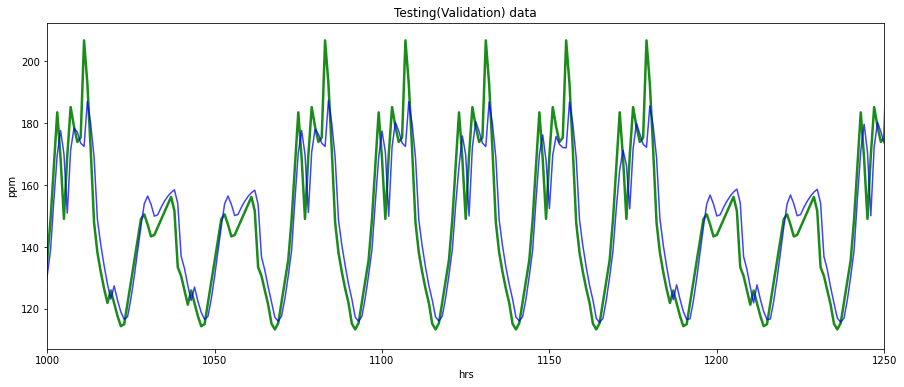

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([1000,1250])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [ ]:
CSV = pd.DataFrame({
    "actual": test_y,
    "ridge" : testPredict

})

CSV.to_csv("24-Hourly_E_Only_PM2.5_Actual_Test_Data_and_Predicted_Data_by_Bi-LSTM.csv", index=False)

## **ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

TypeError: ignored

In [ ]:
classifier.fit(train_X, train_y, batch_size = 10, nb_epoch = 50)
y_pred = classifier.predict(test_X)

## **GRU**

## **RECURRENT NEURAL NETWORK**

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))